In [16]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

RANDOM_SEED = 4321
np.random.seed = RANDOM_SEED

In [17]:
train = pd.read_csv('data/train_clean.csv')
train.info()
train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26884 entries, 0 to 26883
Data columns (total 25 columns):
CUST_COD               26884 non-null int64
LIMIT_BAL              26884 non-null float64
SEX                    26626 non-null object
EDUCATION              26571 non-null object
MARRIAGE               26834 non-null object
BIRTH_DATE             26182 non-null object
PAY_DEC                26884 non-null int64
PAY_NOV                26884 non-null int64
PAY_OCT                26884 non-null int64
PAY_SEP                26884 non-null int64
PAY_AUG                26884 non-null int64
PAY_JUL                26884 non-null int64
BILL_AMT_DEC           26884 non-null float64
BILL_AMT_NOV           26884 non-null float64
BILL_AMT_OCT           26884 non-null float64
BILL_AMT_SEP           26884 non-null float64
BILL_AMT_AUG           26884 non-null float64
BILL_AMT_JUL           26884 non-null float64
PAY_AMT_DEC            26884 non-null float64
PAY_AMT_NOV            26884 non-nu

,CUST_COD,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,BIRTH_DATE,PAY_DEC,PAY_NOV,PAY_OCT,PAY_SEP,...,BILL_AMT_SEP,BILL_AMT_AUG,BILL_AMT_JUL,PAY_AMT_DEC,PAY_AMT_NOV,PAY_AMT_OCT,PAY_AMT_SEP,PAY_AMT_AUG,PAY_AMT_JUL,DEFAULT PAYMENT JAN
0,53613503,1490.680,M,university,single,NaN,0,0,0,0,...,629.156401,599.283174,608.257067,89.440800,149.068000,68.571280,0.000000,29.813600,59.627200,0
1,35524089,5664.584,M,university,married,04/01/1983,0,0,0,0,...,533.872135,-2.772665,-14.399969,149.068000,159.830710,29.813600,0.000000,0.000000,0.000000,1
2,58777007,6260.856,F,high school,married,02/01/1975,0,0,-1,-1,...,-19.349026,-19.349026,-19.349026,59.627200,532.590150,16.963938,0.000000,0.000000,29.813600,0
3,26913418,8944.080,F,graduate school,married,15/01/1977,-2,-2,-2,-2,...,88.546392,70.330282,253.177091,80.556347,217.221890,88.784901,70.628418,298.463950,216.416922,0
4,41993633,3577.632,F,graduate school,married,09/01/1978,-1,-1,-1,-1,...,0.000000,569.439760,0.000000,119.254400,29.813600,0.000000,569.439760,0.000000,0.000000,1
5,46414261,2385.088,M,university,single,27/01/1989,2,0,0,0,...,1670.515635,1706.768973,1744.542804,107.716537,92.422160,59.627200,62.608560,65.589920,60.849558,1
6,10438751,596.272,M,university,married,08/01/1985,1,2,0,0,...,591.978842,570.840999,607.273218,0.000000,38.847121,20.571384,25.371374,50.683120,0.000000,1
7,19267237,10732.896,F,university,single,16/01/1983,-1,-1,-1,-1,...,146.444403,34.285640,0.000000,293.962096,254.518703,146.444403,0.000000,0.000000,277.087598,0
8,39470148,1490.680,M,university,single,07/01/1992,2,0,0,0,...,582.080726,1051.466045,479.969146,89.440800,38.757680,19.140331,18.245923,35.537811,17.888160,1
9,24381216,1490.680,F,university,married,19/01/1992,0,0,0,0,...,741.762368,778.075333,801.568450,59.627200,104.496668,59.627200,238.508800,119.254400,108.819640,1


# Dataset study

Only the attributes relating to a customer's census (ie. Sex, Education, Marriage and Birth date) have some missing values, most of which are in the birth date field. For now, we ignore them; we'll treat them after the preliminary dataset study.

## Target variable 

count    26884.000000
mean         0.221098
std          0.414994
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: DEFAULT PAYMENT JAN, dtype: float64

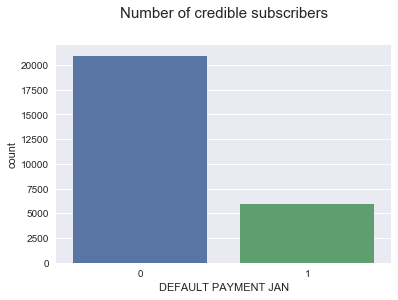

In [18]:
plt.title('Number of credible subscribers', y=1.1, size=15)
sns.countplot('DEFAULT PAYMENT JAN', data=train)
train['DEFAULT PAYMENT JAN'].describe()

So most subscribers are credible, as expected.

## Credibility wrt other variables

### Monthly credit

First we take a look at the monthly credit distribution: 

count    26884.00000
mean      4997.91411
std       3879.73624
min        298.13600
25%       1490.68000
50%       4173.90400
75%       7155.26400
max      29813.60000
Name: LIMIT_BAL, dtype: float64

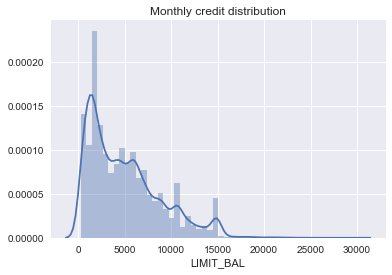

In [19]:
plt.title("Monthly credit distribution")
sns.distplot(train['LIMIT_BAL'])
train['LIMIT_BAL'].describe()

Then we take a look at the average monthly balance of uncredible and credible subscribers:

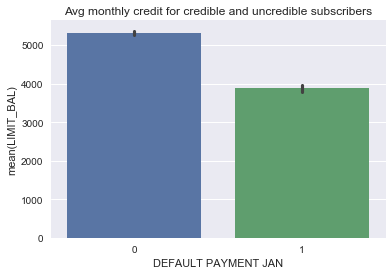

In [20]:
plt.title('Avg monthly credit for credible and uncredible subscribers')
sns.barplot(x = 'DEFAULT PAYMENT JAN', y = 'LIMIT_BAL', data = train)

### Sex

count     26626
unique        2
top           F
freq      16071
Name: SEX, dtype: object

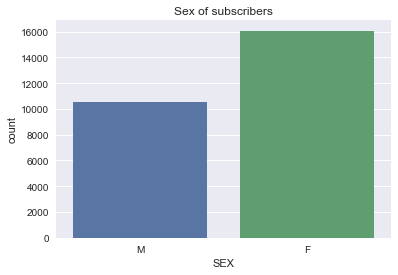

In [21]:
plt.title('Sex of subscribers')
sns.countplot(x = 'SEX', data = train)
train['SEX'].describe()

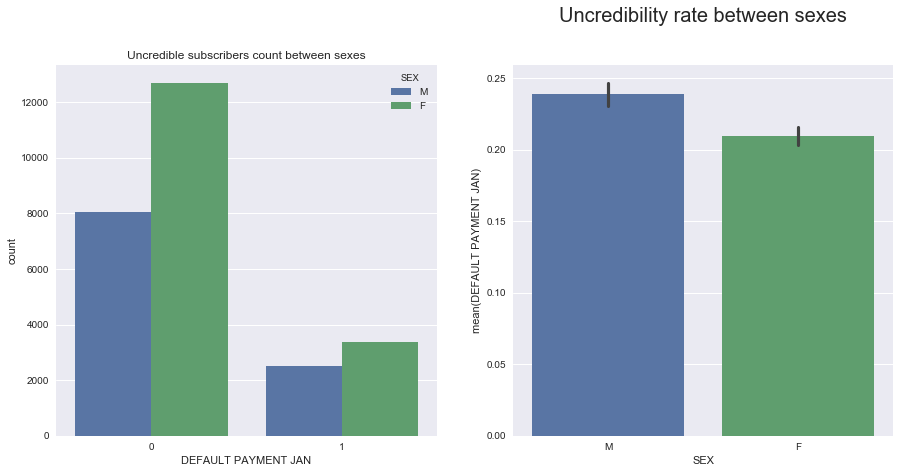

In [22]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.title('Uncredible subscribers count between sexes')
sns.countplot(x = 'DEFAULT PAYMENT JAN', hue = "SEX", data = train)

plt.subplot(2, 2, 2)
plt.title('Uncredibility rate between sexes', size=20, y=1.1)
sns.barplot(x = 'SEX', y = 'DEFAULT PAYMENT JAN', data = train)

### Education

count          26571
unique             4
top       university
freq           12545
Name: EDUCATION, dtype: object

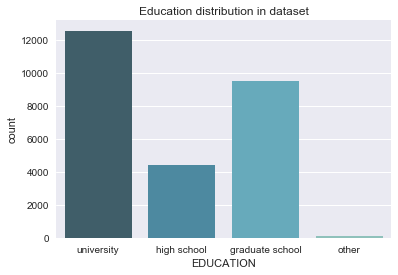

In [23]:
plt.title('Education distribution in dataset')
sns.countplot(x = 'EDUCATION', data = train, palette = 'GnBu_d')
train['EDUCATION'].describe()

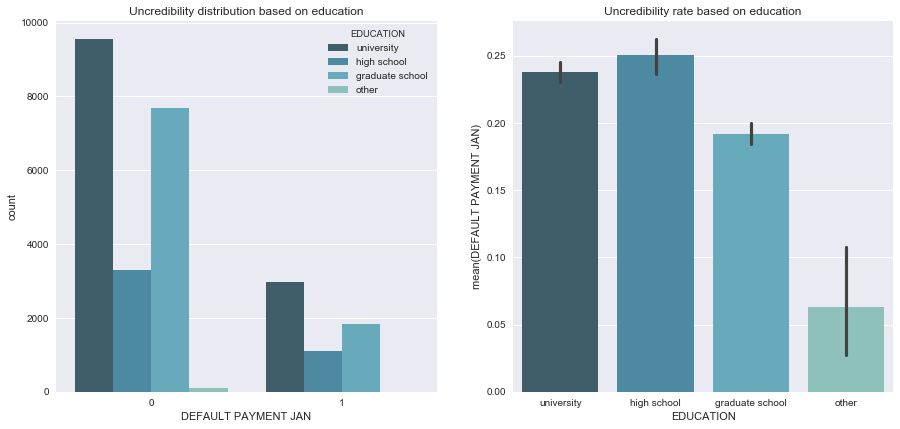

In [24]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.title('Uncredibility distribution based on education')
sns.countplot(x = 'DEFAULT PAYMENT JAN', hue = 'EDUCATION', data = train, palette = 'GnBu_d')

plt.subplot(2, 2, 2)
plt.title('Uncredibility rate based on education')
sns.barplot(x = 'EDUCATION', y = 'DEFAULT PAYMENT JAN', data = train, palette = 'GnBu_d')

### Marital Status

count      26834
unique         3
top       single
freq       14321
Name: MARRIAGE, dtype: object

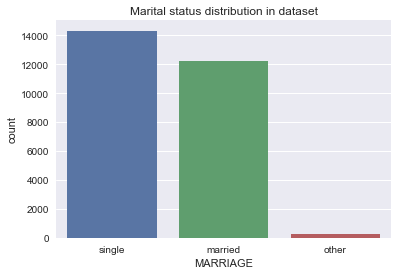

In [25]:
plt.title('Marital status distribution in dataset')
sns.countplot(x = 'MARRIAGE', data = train)
train['MARRIAGE'].describe()

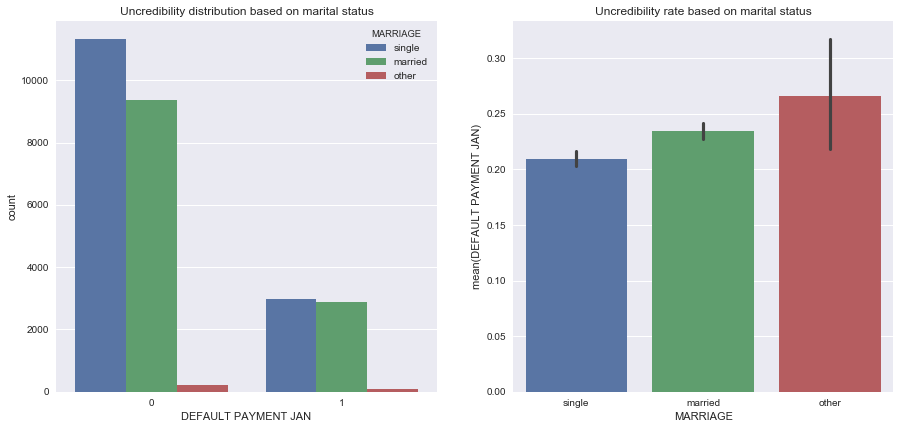

In [26]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.title('Uncredibility distribution based on marital status')
sns.countplot(x = 'DEFAULT PAYMENT JAN', hue = 'MARRIAGE', data = train)

plt.subplot(2, 2, 2,)
plt.title('Uncredibility rate based on marital status')
sns.barplot(x = 'MARRIAGE', y = 'DEFAULT PAYMENT JAN', data = train)

### Birth Date

We convert the birth date value into the customer's age and we plot its distribution in the dataset, ignoring the null values:

In [27]:
import datetime
def get_age(date):
    try:
        return (datetime.datetime.today() - datetime.datetime.strptime(date, '%d/%m/%Y')).days//365
    except Exception as e:
        return date

train['BIRTH_DATE'] = train['BIRTH_DATE'].apply(get_age)

count    26182.000000
mean        36.488160
std          9.201312
min         22.000000
25%         29.000000
50%         35.000000
75%         42.000000
max         76.000000
Name: BIRTH_DATE, dtype: float64

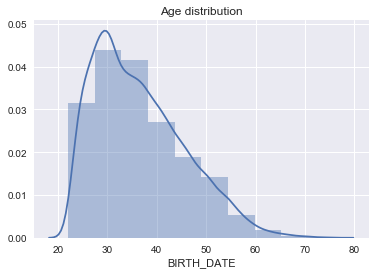

In [28]:
age = train['BIRTH_DATE']

plt.title('Age distribution')
sns.distplot(age[~age.isnull()], bins=10)
age.describe()

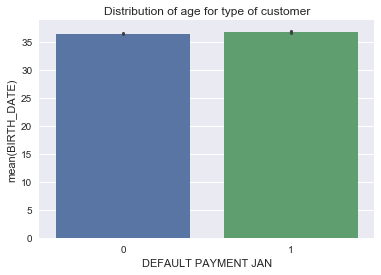

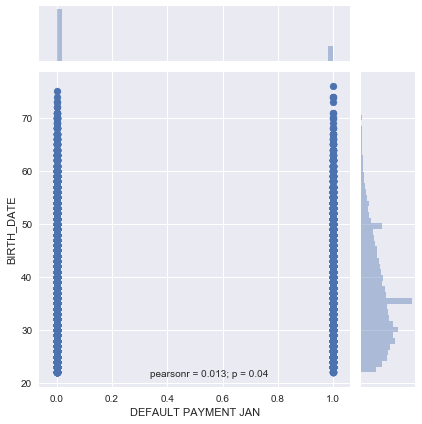

In [29]:

plt.title('Average age for type of customer')
sns.barplot(x = 'DEFAULT PAYMENT JAN', y = 'BIRTH_DATE', data = train)

plt.title('Distribution of age for type of customer')
sns.jointplot(x = 'DEFAULT PAYMENT JAN', y = 'BIRTH_DATE', data = train)

From the dataset, birthdate holds <b>no significance</b> over credibility of a customer.

### Monthly payments:
#### December

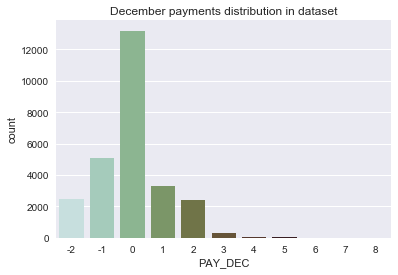

In [30]:
plt.title('December payments distribution in dataset')
sns.countplot(x = 'PAY_DEC', data = train, palette = sns.cubehelix_palette(8, start=.5, rot=.75))

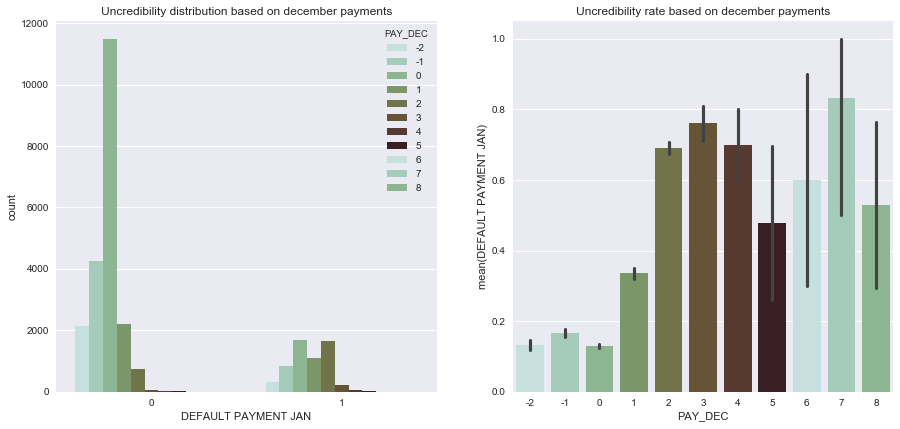

In [31]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.title('Uncredibility distribution based on december payments')
sns.countplot(x = 'DEFAULT PAYMENT JAN', hue = 'PAY_DEC', data = train, palette = sns.cubehelix_palette(8, start=.5, rot=.75))

plt.subplot(2, 2, 2,)
plt.title('Uncredibility rate based on december payments')
sns.barplot(x = 'PAY_DEC', y = 'DEFAULT PAYMENT JAN', data = train, palette = sns.cubehelix_palette(8, start=.5, rot=.75))

#### November

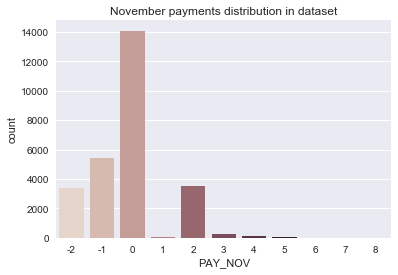

In [32]:
plt.title('November payments distribution in dataset')
sns.countplot(x = 'PAY_NOV', data = train, palette = sns.cubehelix_palette(8, start=.5, rot=.25))

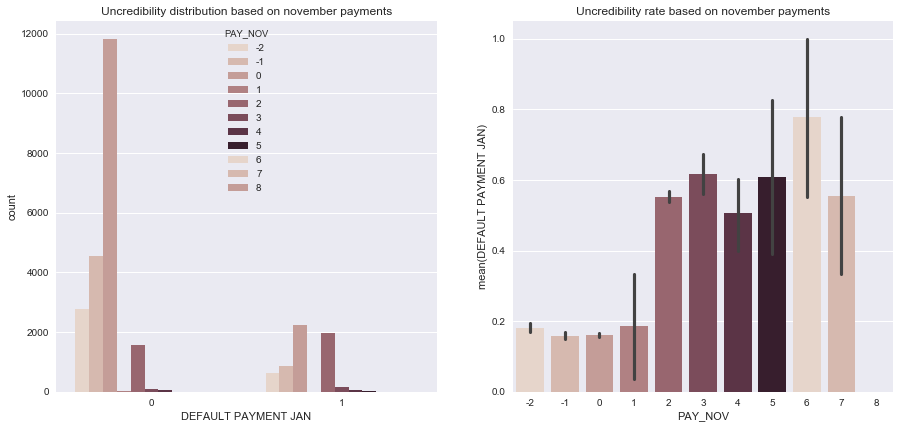

In [33]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.title('Uncredibility distribution based on november payments')
sns.countplot(x = 'DEFAULT PAYMENT JAN', hue = 'PAY_NOV', data = train, palette = sns.cubehelix_palette(8, start=.5, rot=.25))

plt.subplot(2, 2, 2,)
plt.title('Uncredibility rate based on november payments')
sns.barplot(x = 'PAY_NOV', y = 'DEFAULT PAYMENT JAN', data = train, palette = sns.cubehelix_palette(8, start=.5, rot=.25))

#### October

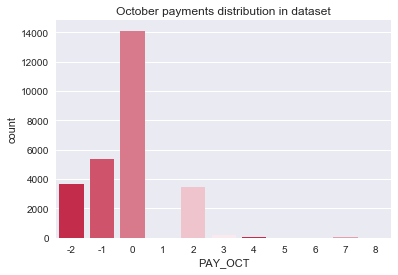

In [34]:
plt.title('October payments distribution in dataset')
sns.countplot(x = 'PAY_OCT', data = train, palette = sns.light_palette('crimson', reverse=True))

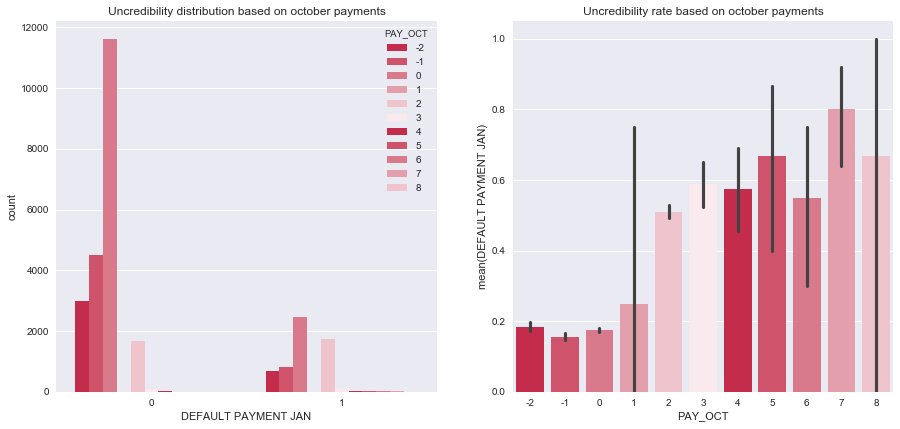

In [35]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.title('Uncredibility distribution based on october payments')
sns.countplot(x = 'DEFAULT PAYMENT JAN', hue = 'PAY_OCT', data = train, palette = sns.light_palette('crimson', reverse=True))

plt.subplot(2, 2, 2,)
plt.title('Uncredibility rate based on october payments')
sns.barplot(x = 'PAY_OCT', y = 'DEFAULT PAYMENT JAN', data = train, palette = sns.light_palette('crimson', reverse=True))

#### September

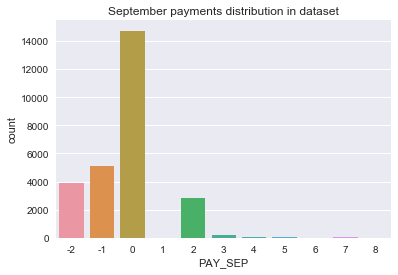

In [36]:
plt.title('September payments distribution in dataset')
sns.countplot(x = 'PAY_SEP', data = train)

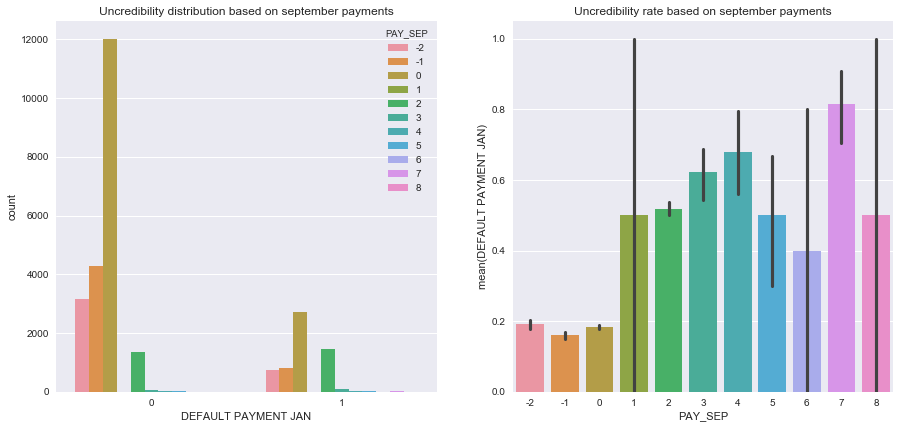

In [37]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.title('Uncredibility distribution based on september payments')
sns.countplot(x = 'DEFAULT PAYMENT JAN', hue = 'PAY_SEP', data = train)

plt.subplot(2, 2, 2,)
plt.title('Uncredibility rate based on september payments')
sns.barplot(x = 'PAY_SEP', y = 'DEFAULT PAYMENT JAN', data = train)

#### August

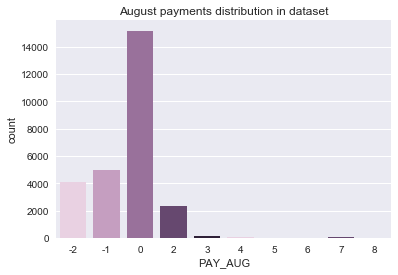

In [38]:
plt.title('August payments distribution in dataset')
sns.countplot(x = 'PAY_AUG', data = train, palette = sns.cubehelix_palette(5, start=.2, rot=.13))

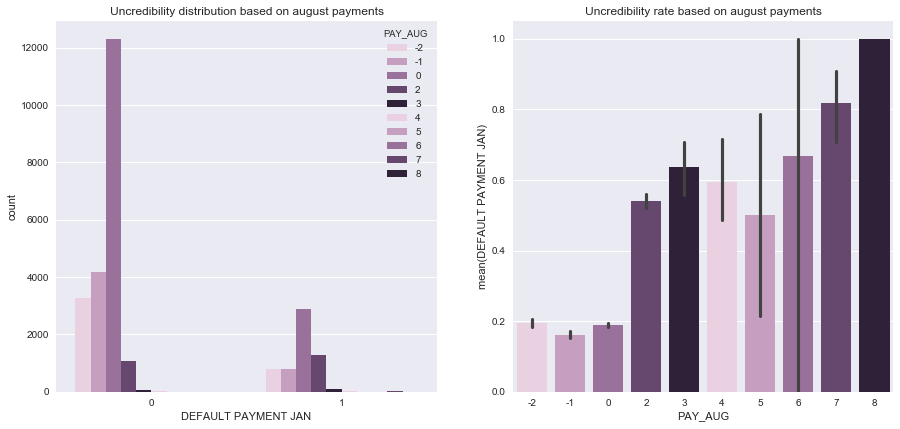

In [39]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.title('Uncredibility distribution based on august payments')
sns.countplot(x = 'DEFAULT PAYMENT JAN', hue = 'PAY_AUG', data = train, palette = sns.cubehelix_palette(5, start=.2, rot=.13))

plt.subplot(2, 2, 2,)
plt.title('Uncredibility rate based on august payments')
sns.barplot(x = 'PAY_AUG', y = 'DEFAULT PAYMENT JAN', data = train, palette = sns.cubehelix_palette(5, start=.2, rot=.13))

#### July

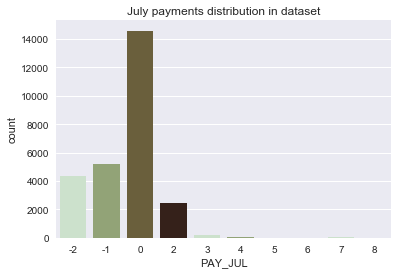

In [40]:
plt.title('July payments distribution in dataset')
sns.countplot(x = 'PAY_JUL', data = train, palette = sns.cubehelix_palette(4, start=.9, rot=.4))

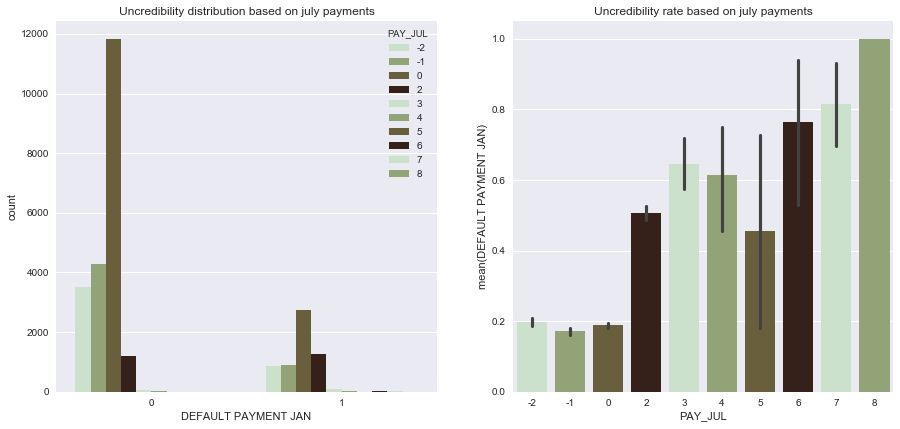

In [41]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.title('Uncredibility distribution based on july payments')
sns.countplot(x = 'DEFAULT PAYMENT JAN', hue = 'PAY_JUL', data = train, palette = sns.cubehelix_palette(4, start=.9, rot=.4))

plt.subplot(2, 2, 2,)
plt.title('Uncredibility rate based on july payments')
sns.barplot(x = 'PAY_JUL', y = 'DEFAULT PAYMENT JAN', data = train, palette = sns.cubehelix_palette(4, start=.9, rot=.4))

#### COMMENT

Months from July till December are mostly consistent. From July till November there is a consistently bigger number of customers with a 2-months delay in payment than a 1-month.
Uncredibility rate is consistent with common sense, i.e. the later a customer is with their payments, the higher the chance of them being insolvent by January is high. There are significant changes in variance in the range between the 1 month lateness and the 8 months lateness, with some cases of a variance = 1.

### Bill amount per month

#### December

count    26884.000000
mean      1530.136656
std       2206.111841
min      -4936.535888
25%        105.115300
50%        667.198554
75%       1997.891324
max      28755.545150
Name: BILL_AMT_DEC, dtype: float64

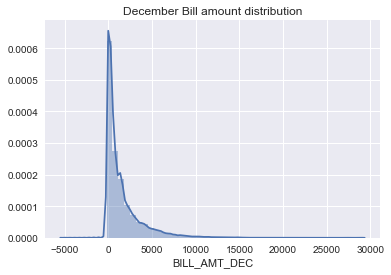

In [42]:
plt.title('December Bill amount distribution')
sns.distplot(train['BILL_AMT_DEC'])
train['BILL_AMT_DEC'].describe()

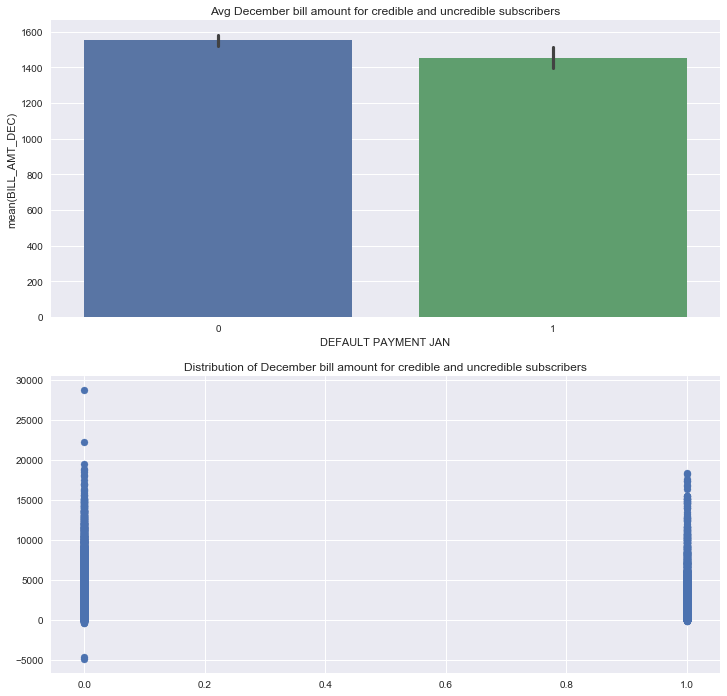

In [43]:
plt.figure(1, figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.title('Avg December bill amount for credible and uncredible subscribers')
sns.barplot(x = 'DEFAULT PAYMENT JAN', y = 'BILL_AMT_DEC', data = train)

plt.subplot(2, 1, 2)
plt.title('Distribution of December bill amount for credible and uncredible subscribers')
plt.scatter(x = 'DEFAULT PAYMENT JAN', y = 'BILL_AMT_DEC', data = train)

#### November

count    26884.000000
mean      1467.012379
std       2129.923058
min      -2080.303567
25%         87.622170
50%        631.705464
75%       1905.320095
max      29334.525260
Name: BILL_AMT_NOV, dtype: float64

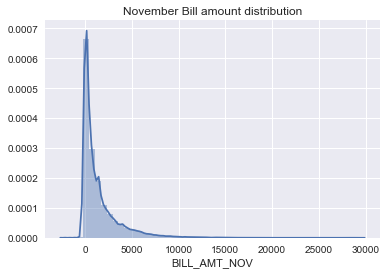

In [44]:
plt.title('November Bill amount distribution')
sns.distplot(train['BILL_AMT_NOV'])
train['BILL_AMT_NOV'].describe()

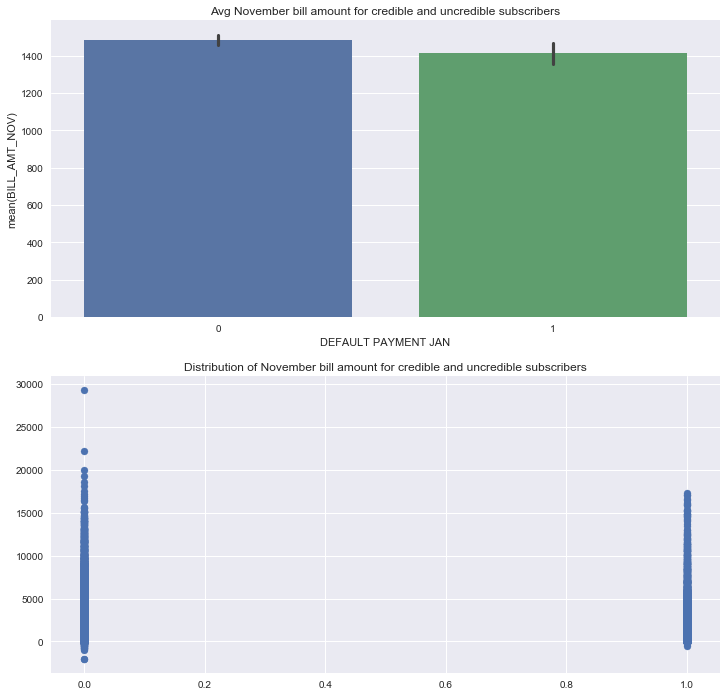

In [45]:
plt.figure(1, figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.title('Avg November bill amount for credible and uncredible subscribers')
sns.barplot(x = 'DEFAULT PAYMENT JAN', y = 'BILL_AMT_NOV', data = train)

plt.subplot(2, 1, 2)
plt.title('Distribution of November bill amount for credible and uncredible subscribers')
plt.scatter(x = 'DEFAULT PAYMENT JAN', y = 'BILL_AMT_NOV', data = train)

#### October

count    26884.000000
mean      1404.166272
std       2072.220534
min      -4688.605990
25%         79.535231
50%        599.491869
75%       1798.386166
max      49612.483810
Name: BILL_AMT_OCT, dtype: float64

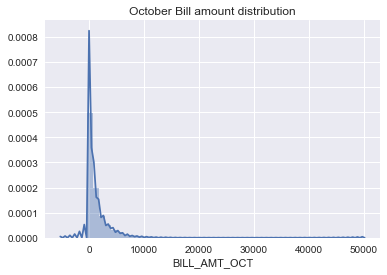

In [46]:
plt.title('October Bill amount distribution')
sns.distplot(train['BILL_AMT_OCT'])
train['BILL_AMT_OCT'].describe()

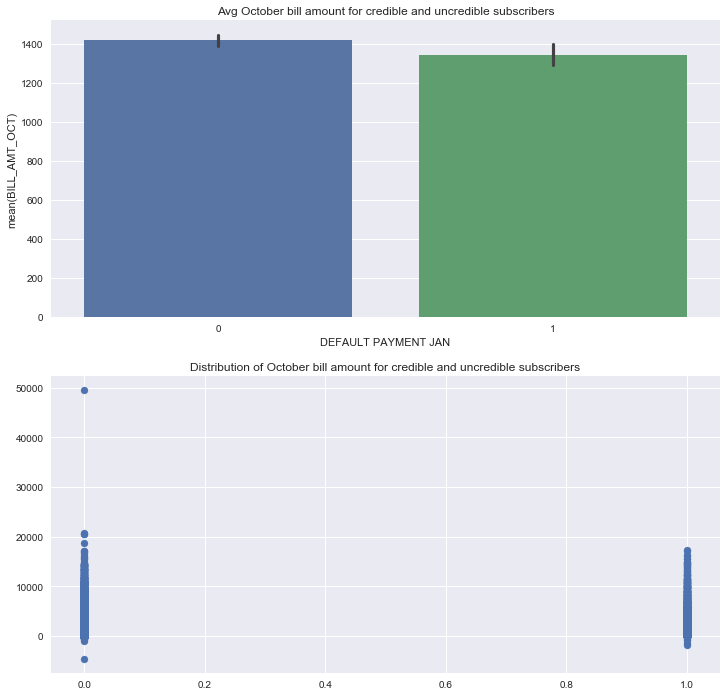

In [47]:
plt.figure(1, figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.title('Avg October bill amount for credible and uncredible subscribers')
sns.barplot(x = 'DEFAULT PAYMENT JAN', y = 'BILL_AMT_OCT', data = train)

plt.subplot(2, 1, 2)
plt.title('Distribution of October bill amount for credible and uncredible subscribers')
plt.scatter(x = 'DEFAULT PAYMENT JAN', y = 'BILL_AMT_OCT', data = train)

#### September

count    26884.000000
mean      1292.346498
std       1923.241494
min      -2424.859342
25%         68.951403
50%        568.008707
75%       1629.998953
max      26581.388370
Name: BILL_AMT_SEP, dtype: float64

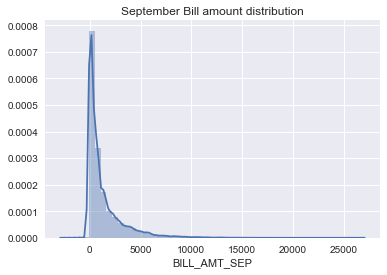

In [48]:
plt.title('September Bill amount distribution')
sns.distplot(train['BILL_AMT_SEP'])
train['BILL_AMT_SEP'].describe()

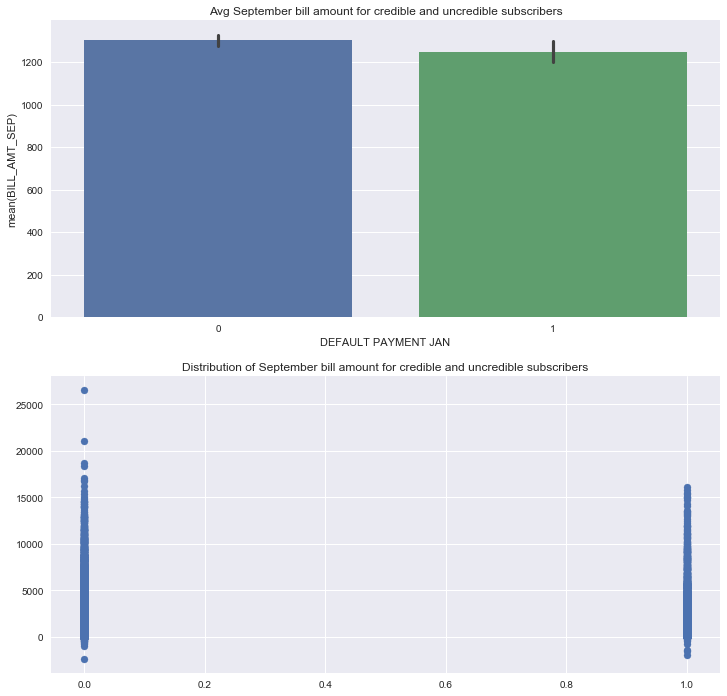

In [49]:
plt.figure(1, figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.title('Avg September bill amount for credible and uncredible subscribers')
sns.barplot(x = 'DEFAULT PAYMENT JAN', y = 'BILL_AMT_SEP', data = train)

plt.subplot(2, 1, 2)
plt.title('Distribution of September bill amount for credible and uncredible subscribers')
plt.scatter(x = 'DEFAULT PAYMENT JAN', y = 'BILL_AMT_SEP', data = train)

#### August

count    26884.000000
mean      1203.977907
std       1816.137779
min      -2424.859342
25%         52.553923
50%        539.998830
75%       1504.528417
max      27642.305330
Name: BILL_AMT_AUG, dtype: float64

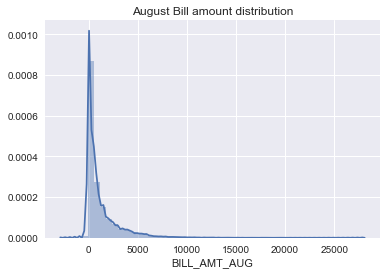

In [50]:
plt.title('August Bill amount distribution')
sns.distplot(train['BILL_AMT_AUG'])
train['BILL_AMT_AUG'].describe()

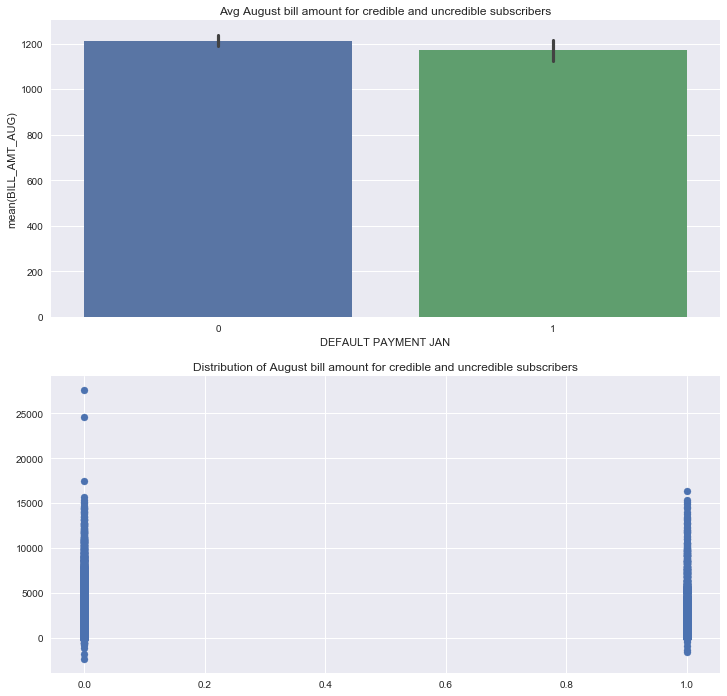

In [51]:
plt.figure(1, figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.title('Avg August bill amount for credible and uncredible subscribers')
sns.barplot(x = 'DEFAULT PAYMENT JAN', y = 'BILL_AMT_AUG', data = train)

plt.subplot(2, 1, 2)
plt.title('Distribution of August bill amount for credible and uncredible subscribers')
plt.scatter(x = 'DEFAULT PAYMENT JAN', y = 'BILL_AMT_AUG', data = train)

#### July

count    26884.000000
mean      1159.529034
std       1775.876050
min     -10124.788000
25%         37.594950
50%        506.920641
75%       1473.179417
max      28670.665830
Name: BILL_AMT_JUL, dtype: float64

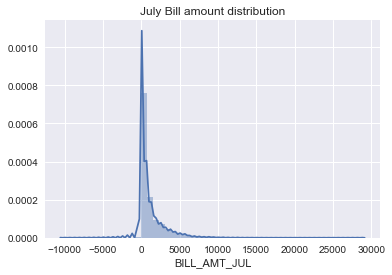

In [52]:
plt.title('July Bill amount distribution')
sns.distplot(train['BILL_AMT_JUL'])
train['BILL_AMT_JUL'].describe()

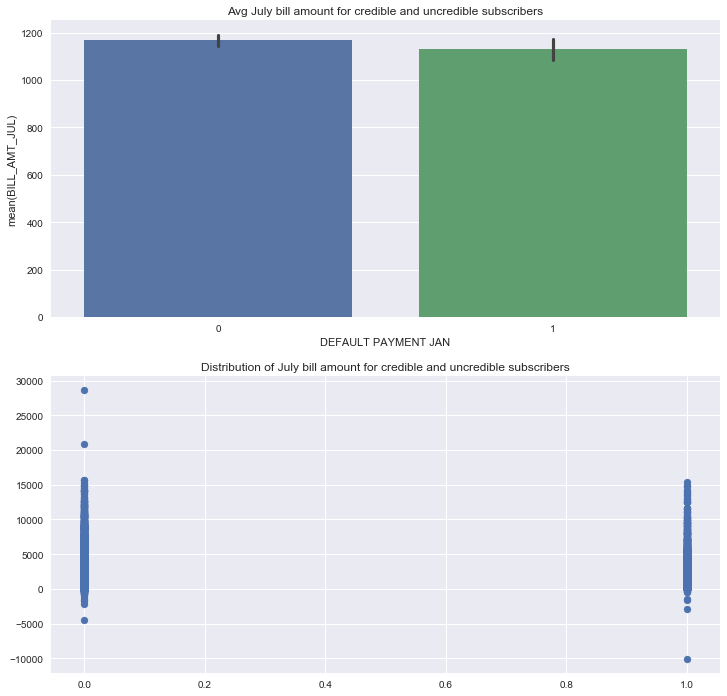

In [53]:
plt.figure(1, figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.title('Avg July bill amount for credible and uncredible subscribers')
sns.barplot(x = 'DEFAULT PAYMENT JAN', y = 'BILL_AMT_JUL', data = train)

plt.subplot(2, 1, 2)
plt.title('Distribution of July bill amount for credible and uncredible subscribers')
plt.scatter(x = 'DEFAULT PAYMENT JAN', y = 'BILL_AMT_JUL', data = train)

#### COMMENTS

Apparently no significant correlation between monthly bill amount and credibility.

### Monthly pay amount

#### December

count    26884.000000
mean       168.639427
std        495.392694
min          0.000000
25%         29.634718
50%         62.608560
75%        149.276695
max      26043.729910
Name: PAY_AMT_DEC, dtype: float64

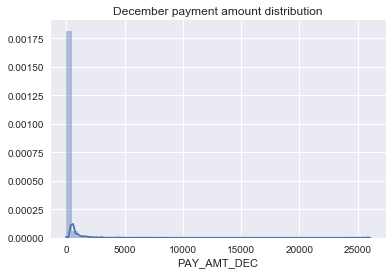

In [54]:
plt.title('December payment amount distribution')
sns.distplot(train['PAY_AMT_DEC'])
train['PAY_AMT_DEC'].describe()

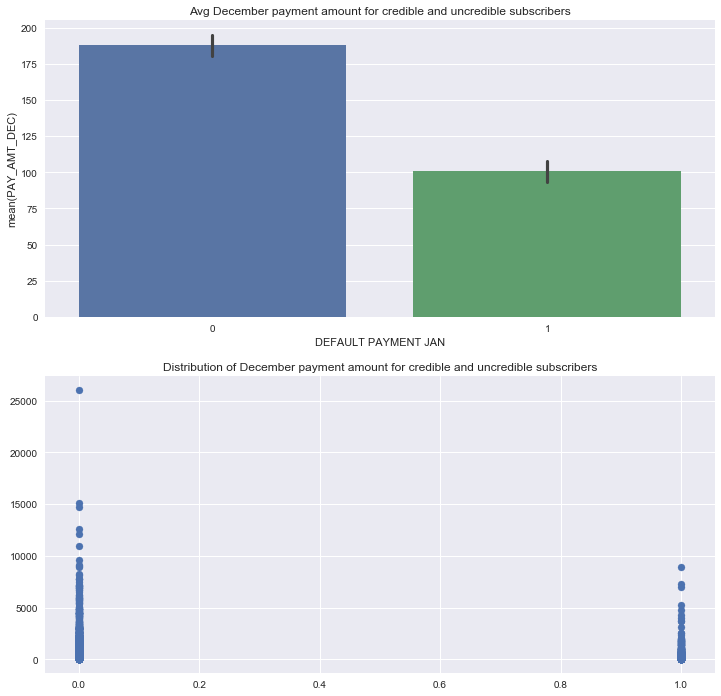

In [55]:
plt.figure(1, figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.title('Avg December payment amount for credible and uncredible subscribers')
sns.barplot(x = 'DEFAULT PAYMENT JAN', y = 'PAY_AMT_DEC', data = train)

plt.subplot(2, 1, 2)
plt.title('Distribution of December payment amount for credible and uncredible subscribers')
plt.scatter(x = 'DEFAULT PAYMENT JAN', y = 'PAY_AMT_DEC', data = train)

#### November

count    26884.000000
mean       178.825861
std        688.001298
min          0.000000
25%         24.879449
50%         60.044590
75%        149.068000
max      50213.824120
Name: PAY_AMT_NOV, dtype: float64

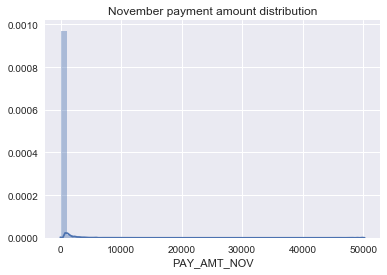

In [56]:
plt.title('November payment amount distribution')
sns.distplot(train['PAY_AMT_NOV'])
train['PAY_AMT_NOV'].describe()

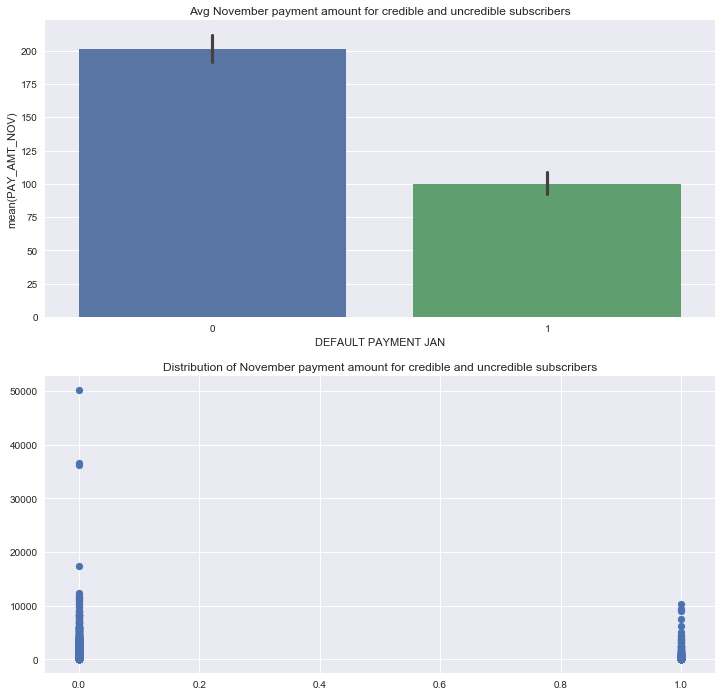

In [57]:
plt.figure(1, figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.title('Avg November payment amount for credible and uncredible subscribers')
sns.barplot(x = 'DEFAULT PAYMENT JAN', y = 'PAY_AMT_NOV', data = train)

plt.subplot(2, 1, 2)
plt.title('Distribution of November payment amount for credible and uncredible subscribers')
plt.scatter(x = 'DEFAULT PAYMENT JAN', y = 'PAY_AMT_NOV', data = train)

#### October

count    26884.000000
mean       156.416357
std        531.588567
min          0.000000
25%         11.627304
50%         54.260752
75%        134.369895
max      26714.178140
Name: PAY_AMT_OCT, dtype: float64

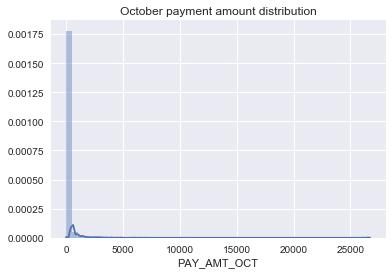

In [58]:
plt.title('October payment amount distribution')
sns.distplot(train['PAY_AMT_OCT'])
train['PAY_AMT_OCT'].describe()

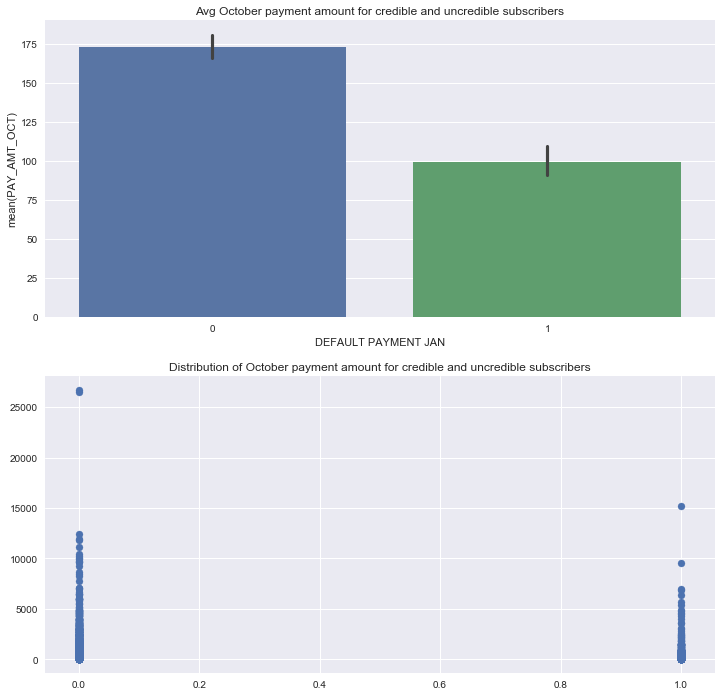

In [59]:
plt.figure(1, figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.title('Avg October payment amount for credible and uncredible subscribers')
sns.barplot(x = 'DEFAULT PAYMENT JAN', y = 'PAY_AMT_OCT', data = train)

plt.subplot(2, 1, 2)
plt.title('Distribution of October payment amount for credible and uncredible subscribers')
plt.scatter(x = 'DEFAULT PAYMENT JAN', y = 'PAY_AMT_OCT', data = train)

#### September

count    26884.000000
mean       144.518815
std        465.903631
min          0.000000
25%          8.884453
50%         44.720400
75%        119.709057
max      18514.245600
Name: PAY_AMT_SEP, dtype: float64

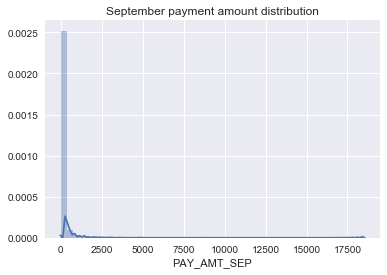

In [60]:
plt.title('September payment amount distribution')
sns.distplot(train['PAY_AMT_SEP'])
train['PAY_AMT_SEP'].describe()

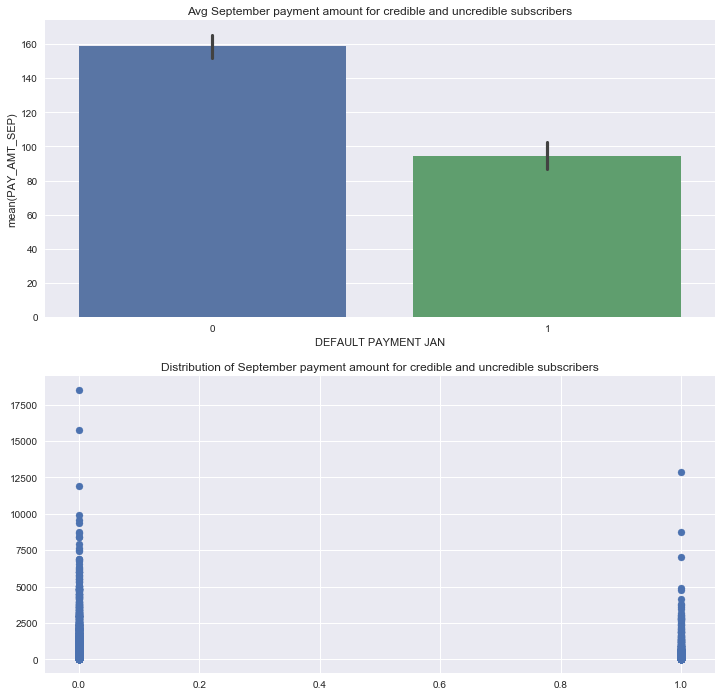

In [61]:
plt.figure(1, figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.title('Avg September payment amount for credible and uncredible subscribers')
sns.barplot(x = 'DEFAULT PAYMENT JAN', y = 'PAY_AMT_SEP', data = train)

plt.subplot(2, 1, 2)
plt.title('Distribution of September payment amount for credible and uncredible subscribers')
plt.scatter(x = 'DEFAULT PAYMENT JAN', y = 'PAY_AMT_SEP', data = train)

#### August

count    26884.000000
mean       144.259750
std        463.780141
min          0.000000
25%          7.870790
50%         44.720400
75%        120.379863
max      12716.364990
Name: PAY_AMT_AUG, dtype: float64

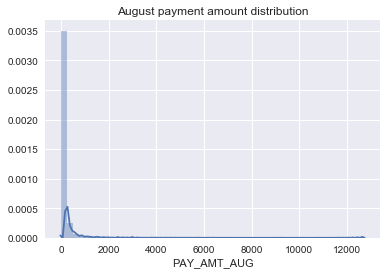

In [62]:
plt.title('August payment amount distribution')
sns.distplot(train['PAY_AMT_AUG'])
train['PAY_AMT_AUG'].describe()

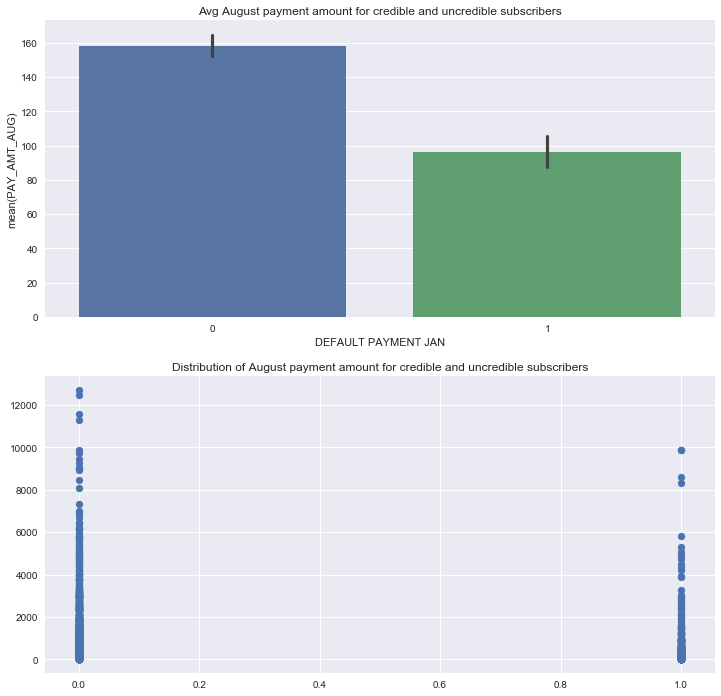

In [63]:
plt.figure(1, figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.title('Avg August payment amount for credible and uncredible subscribers')
sns.barplot(x = 'DEFAULT PAYMENT JAN', y = 'PAY_AMT_AUG', data = train)

plt.subplot(2, 1, 2)
plt.title('Distribution of August payment amount for credible and uncredible subscribers')
plt.scatter(x = 'DEFAULT PAYMENT JAN', y = 'PAY_AMT_AUG', data = train)

#### July

count    26884.000000
mean       157.534344
std        538.637089
min          0.000000
25%          3.637259
50%         44.720400
75%        119.321481
max      15761.436660
Name: PAY_AMT_JUL, dtype: float64

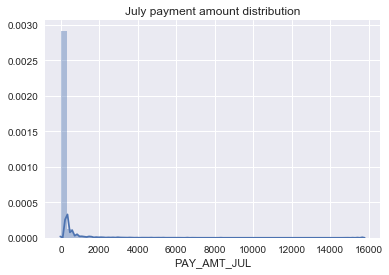

In [64]:
plt.title('July payment amount distribution')
sns.distplot(train['PAY_AMT_JUL'])
train['PAY_AMT_JUL'].describe()

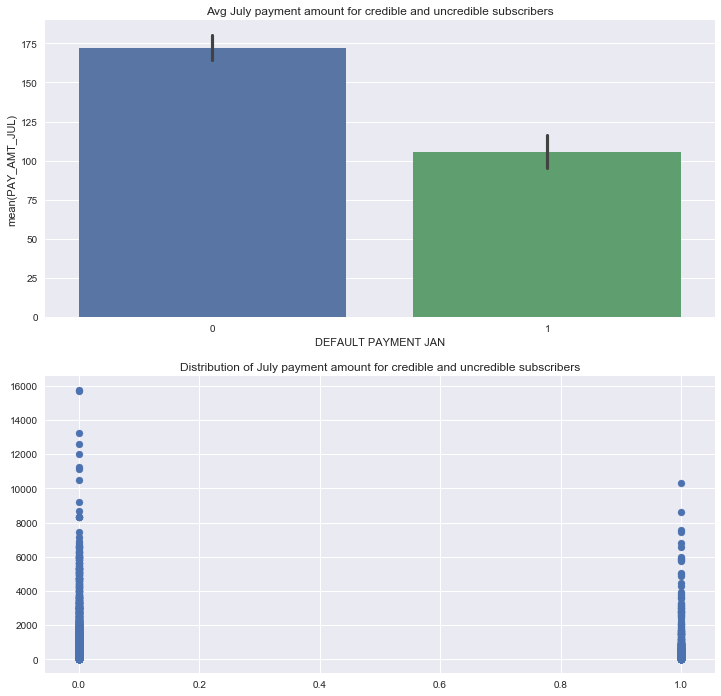

In [65]:
plt.figure(1, figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.title('Avg July payment amount for credible and uncredible subscribers')
sns.barplot(x = 'DEFAULT PAYMENT JAN', y = 'PAY_AMT_JUL', data = train)

plt.subplot(2, 1, 2)
plt.title('Distribution of July payment amount for credible and uncredible subscribers')
plt.scatter(x = 'DEFAULT PAYMENT JAN', y = 'PAY_AMT_JUL', data = train)

#### COMMENTS
The results are consistent between months, and also with regards to common sense, i.e. that the less a customer pays back their due debit, the higher the chance that this client will be insolvent. This is more pronounced in the month of December: while the average of uncredible customer's payment keeps about the same level throughout the months, the variance seems to slightly increase.

### AGGREGATE VALUES
For aggregate values and study of the <code>PAY_month</code>, <code>BILL_AMT_month</code> and <code>PAY_AMT_month</code> attributes, check Andrea's notebook

# Naive Bayes Classifier #

In [106]:
from sklearn import naive_bayes
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

train_nb=pd.read_csv('data/train_with_additional_features.csv')
train_nb.info()
train_nb.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26884 entries, 0 to 26883
Data columns (total 64 columns):
Unnamed: 0                   26884 non-null int64
LIMIT_BAL                    26884 non-null float64
SEX                          26884 non-null float64
PAY_DEC                      26884 non-null float64
PAY_NOV                      26884 non-null float64
PAY_OCT                      26884 non-null float64
PAY_SEP                      26884 non-null float64
PAY_AUG                      26884 non-null float64
PAY_JUL                      26884 non-null float64
BILL_AMT_DEC                 26884 non-null float64
BILL_AMT_NOV                 26884 non-null float64
BILL_AMT_OCT                 26884 non-null float64
BILL_AMT_SEP                 26884 non-null float64
BILL_AMT_AUG                 26884 non-null float64
BILL_AMT_JUL                 26884 non-null float64
PAY_AMT_DEC                  26884 non-null float64
PAY_AMT_NOV                  26884 non-null float64
PAY_AMT_O

,Unnamed: 0,LIMIT_BAL,SEX,PAY_DEC,PAY_NOV,PAY_OCT,PAY_SEP,PAY_AUG,PAY_JUL,BILL_AMT_DEC,...,DELTA_3,DELTA_4,DELTA_5,PROD,TOTAL_AMT_PAY,BILL_DELTA_JUL,BILL_DELTA_AUG,BILL_DELTA_SEP,BILL_DELTA_OCT,BILL_DELTA_NOV
0,0,1490.680,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1494.853904,...,-47.194929,-119.284214,1032.176646,1867.578667,396.520880,-8.973894,29.873227,-47.194929,-119.284214,1032.176646
1,1,5664.584,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,2946.001070,...,2603.412993,-91.110362,-100.173696,27194.840980,338.712310,11.627304,536.644800,2603.412993,-91.110362,-100.173696
2,2,6260.856,1.0,0.0,0.0,-1.0,-1.0,-2.0,-2.0,1761.119166,...,30.201177,1743.081938,7.185078,20521.144615,638.994889,0.000000,0.000000,30.201177,1743.081938,7.185078
3,3,8944.080,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,88.635833,...,128.198480,-136.427034,8.317994,490.880551,972.072428,-182.846809,18.216110,128.198480,-136.427034,8.317994
4,4,3577.632,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,29.217328,...,29.813600,89.440800,-90.037072,-111.494535,718.507760,569.439760,-569.439760,29.813600,89.440800,-90.037072
5,5,2385.088,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2292.546586,...,675.576176,-0.864594,-52.680631,1357.113716,448.813934,-37.773831,-36.253338,675.576176,-0.864594,-52.680631
6,6,596.272,0.0,1.0,2.0,0.0,0.0,0.0,0.0,645.017236,...,-11.537863,8.347808,56.228450,-7.601777,135.472998,-36.432219,21.137842,-11.537863,8.347808,56.228450
7,7,10732.896,1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,159.323878,...,6.708060,140.571124,-134.399709,1283.870530,972.012801,34.285640,112.158763,6.708060,140.571124,-134.399709
8,8,1490.680,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1289.348759,...,741.166096,19.438468,-53.336531,1702.293581,219.010706,571.496899,-469.385319,741.166096,19.438468,-53.336531
9,9,1490.680,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1458.719821,...,195.219453,36.312965,485.425035,-1557.328522,690.333908,-23.493117,-36.312965,195.219453,36.312965,485.425035


## Bernoulli ##

In [101]:
gnb = BernoulliNB()
x = train_nb.drop(['DEFAULT PAYMENT JAN'], axis = 1)
y = train_nb['DEFAULT PAYMENT JAN']
y_fit = gnb.fit(x, y)
y_pred = y_fit.predict(x)
print("Number of mislabeled points out of a total %d points : %d"
       % (x.shape[0],(y != y_pred).sum()))

xval = model_selection.cross_val_score(y_fit, x, y, cv=KFold(n_splits=10, shuffle=True, random_state=1234))
print("Bernoulli Naive Bayes Accuracy = %3.2f +/- %.4f\n" %(np.average(xval),np.std(xval)))

f1_score(y, y_pred, average='binary')

Number of mislabeled points out of a total 26884 points : 6308
Bernoulli Naive Bayes Accuracy = 0.77 +/- 0.0100



0.52946441891690277

## Gaussian with attribute normalization ##

In [113]:
gnb = GaussianNB()
x = train_nb.drop(['DEFAULT PAYMENT JAN'], axis = 1)
scaler=StandardScaler()
x = scaler.fit_transform(x)

y = train_nb['DEFAULT PAYMENT JAN']

y_fit = gnb.fit(x, y)
y_pred = y_fit.predict(x)
print("Number of mislabeled points out of a total %d points : %d"
       % (x.shape[0],(y != y_pred).sum()))

xval = model_selection.cross_val_score(y_fit, x, y, cv=KFold(n_splits=10, shuffle=True, random_state=1234))
print("Gaussian Naive Bayes Accuracy = %3.2f +/- %.4f\n" %(np.average(xval),np.std(xval)))

f1_score(y, y_pred, average='binary')

Number of mislabeled points out of a total 26884 points : 16904
Gaussian Naive Bayes Accuracy = 0.37 +/- 0.0121



0.39049542078315425